<img src='pics/otus.png'>

In [1]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings


%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

## 0. Выберите любой датасет, связанный с медицинской тематикой.

# 1. Провести EDA
Просмотреть структуру данных, значения каждого признака, поискать особенности в признаках и в данных вцелом

# 2. Спланировать эксперимент 


Эксперимент - составить план, по которому будет проделана исследовательская работа. Примерные пункты плана:
* Составить первичный список признаков, необходимых для решения задачи
* Сгенерировать список новых признаков, которые можно получить из данных
* Применить понижение размерности для визуализации данных
* Применить кластеризацию, визуализировать
* Описание кластера
* Любые другие пункты

# 3. Выполнить подготовку данных для построения модели

Выполнить необходимые преобразования данных

# 4. Провести построение модели 

# 5. Проанализировать результат
получилось или нет, почему, что можно улучшить, можно ли интерпретировать результат

# 6. Повторить при необходимости 

# Подсказки

* Проводить EDA и работу с признаками на всем датасете
* Для построения модели отсеивать данные тем или иным способом (обосновать выбор) - уменьшить объем данных для анализа
* Оформлять для сдачи задания все эксперименты (в том числе неудачные). Так мы сможем увидеть процесс работы над заданием
* Не тратить 90% времени на первый этап. Планировать время так, чтобы успеть поработать над моделью (в равной степени над каждым пунктом).

# ДЗ

### DataSet from kaggle.com

**Heart Disease UCI**
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

https://www.kaggle.com/ronitf/heart-disease-uci

**Context**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. 
In particular, the Cleveland database is the only one that has been used by ML researchers to this date.
The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

#### Контекст

Этот датасет содержит 76 атрибутов, но все опубликованные эксперименты относятся к использованию подмножества 14 из них.
На самом дела, только в Кливленде, использовали ML исследование к этим данным на данный момент (к этим дням)

Поле "цель" относится к наличию сердечных заболеваний у пациента.
Это целое число от 0 (отсутствие присутствия) до 4.

**Columns**

* **age** age in years / возраст в годах

* **sex** (1 = male; 0 = female) / пол (1 = мужчина; 0 = женщина)

* **cp** chest pain type (4 values) / тип боли в груди (4 варианта)

* **trestbps** resting blood pressure (in mm Hg on admission to the hospital) / кровяное давление в спокойном состоянии

* **chol** serum cholestoral in mg/dl / сывороточный холестерин в мг/дл

* **fbs** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  / сахар в крови натощак > 120 мг/дл

* **restecg** resting electrocardiographic results / результаты электрокардиографии (значения 0,1,2)

* **thalach** maximum heart rate achieved  / максимальная частота сердечных сокращений

* **exang** exercise induced angina (1 = yes; 0 = no) / стенокардия вызванная нагрузкой(упражнениями) (1=да; 0=нет)

* **oldpeak** ST depression induced by exercise relative to rest

* **slope** the slope of the peak exercise ST segment / плохое самочуствие вызванная физическими упражнениями относительно отдыха

* **ca** number of major vessels (0-3) colored by flourosopy / количество крупных судов (0-3) подсвечено рентгеноскопией

* **thal** 3 = normal; 6 = fixed defect; 7 = reversable defect / 3 = нормальный; 6 = фиксированный дефект; 7 = реверсивный дефект

* **target** 1 or 0

#### Inspiration

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.


#### Идея

Посмотрите, можете ли вы найти какие-либо другие тенденции в сердечных данных, чтобы предсказать определенные сердечно-сосудистые события или найти какие-либо четкие признаки здоровья сердца.

In [2]:
df_v01 = pd.read_csv('heart.csv', index_col=False)
df_v01.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [3]:
df_v01.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df_v01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df_v01.index

RangeIndex(start=0, stop=303, step=1)

In [6]:
y = df_v01.target.as_matrix()

In [7]:
df_v01['target'] = pd.Categorical(df_v01.target).codes 
df_v01.drop(df_v01.columns[len(df_v01.columns)-1], axis=1, inplace=True)
X = df_v01

In [8]:
X.shape


(303, 13)

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

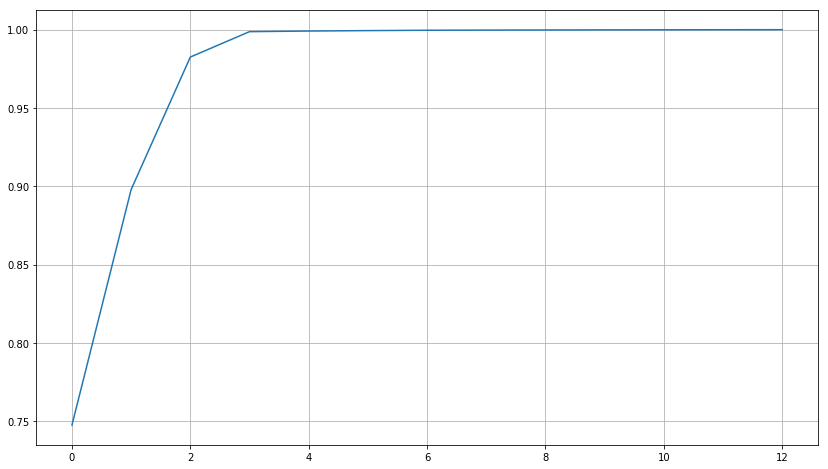

In [10]:
plt.rcParams["figure.figsize"] = (14, 8)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

In [11]:
x_new = PCA(n_components=0.999).fit_transform(X)
x_new.shape

(303, 5)

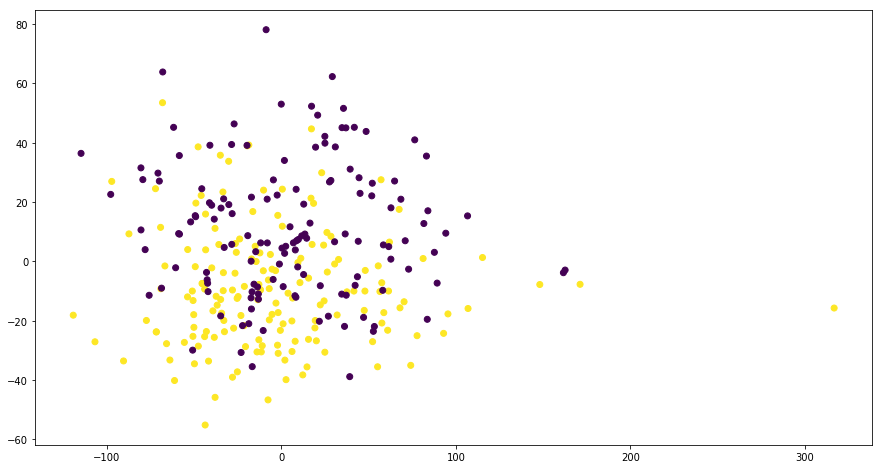

In [12]:
plt.rcParams["figure.figsize"] = (15, 8)
plt.scatter(x_new[:, 0], x_new[:, 1], c=y);

In [13]:
X_sample = X[:]
y_sample = y[:]
X_sample.shape, X.shape, y.shape, y_sample.shape

((303, 13), (303, 13), (303,), (303,))

In [14]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_sample)
X_reduced.shape

(303, 2)

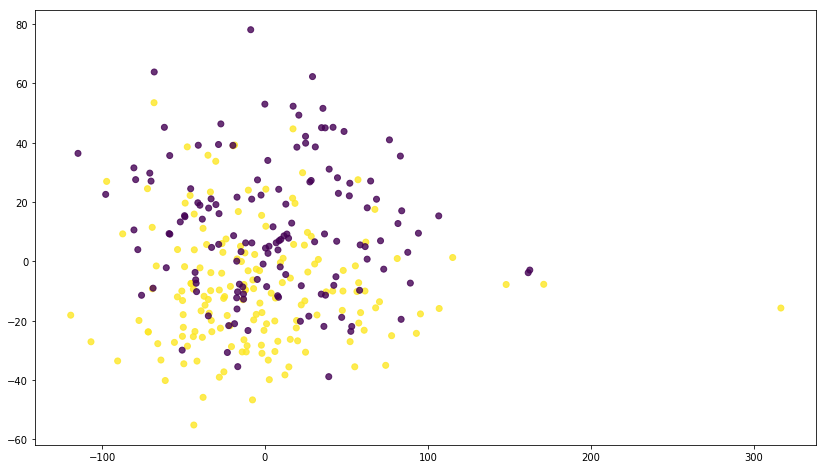

In [15]:
plt.rcParams["figure.figsize"] = (14, 8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample, alpha=0.8)

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_sample)

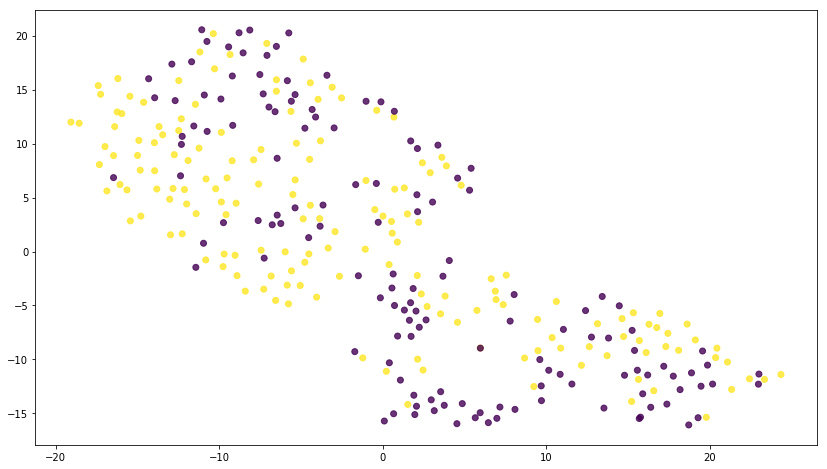

In [17]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample, alpha=0.8)

## New version. Lets try again.

In [18]:
df_vers2 = pd.read_csv('heart.csv')
df_vers2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [19]:
X = df_vers2.drop(['target'], axis=1).as_matrix()
X.shape

(303, 13)

In [20]:
y = df_vers2['target'].as_matrix()
y.shape

(303,)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=5)
lr.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [23]:
y_pred = lr.predict(x_test)

In [24]:
roc_auc_score(y_test, y_pred)

0.7990812379110253

In [25]:
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**1.** plot the explained variance

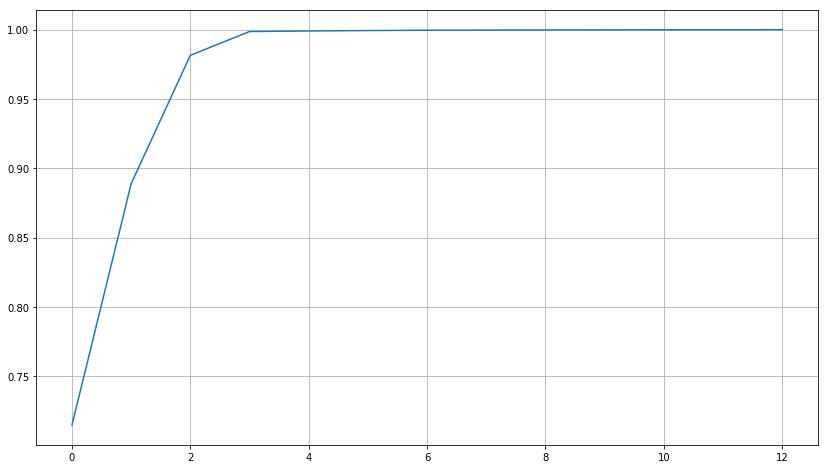

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

**2.** plot the reduced dataset in a 2-dimensional space

In [27]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_train_pca.shape

(212, 2)

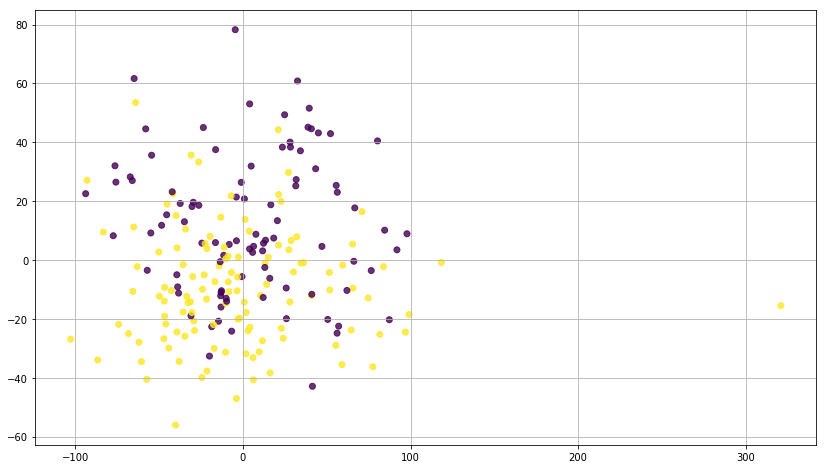

In [28]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 8)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, alpha=0.8)
plt.grid()
plt.show()

# Пункт 2. Взял все поля не равные 1/0. Далее кластеризую.

In [29]:
df_v02 = pd.read_csv('heart.csv')
df_v02.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [30]:
age_trestbps_chol_thalach_oldpeak = df_v02[["age", "trestbps","chol", "thalach", "oldpeak" ]]
X_new_collumns = age_trestbps_chol_thalach_oldpeak.as_matrix()
X_new_collumns.shape

(303, 5)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
x_new_col_train, x_new_col_test, y_new_col_train, y_new_col_test = train_test_split(X_new_collumns, y, test_size=0.3)

In [32]:
pca = PCA()
pca.fit(x_new_col_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

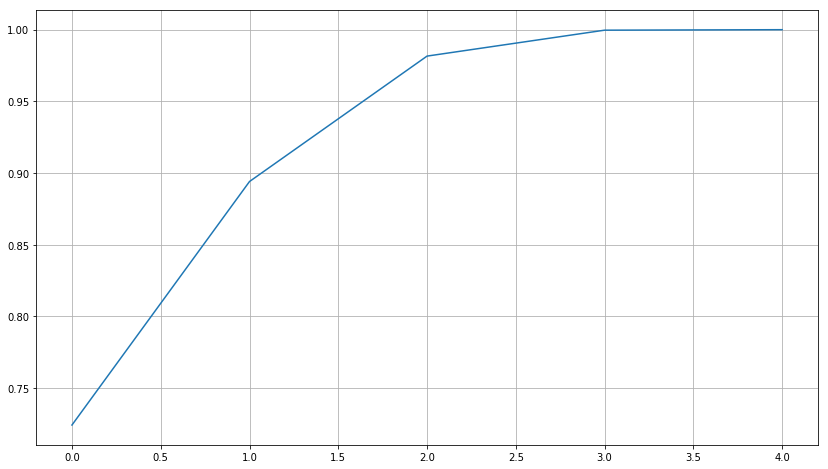

In [33]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

In [34]:
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_new_col_train)
x_train_pca.shape

(212, 3)

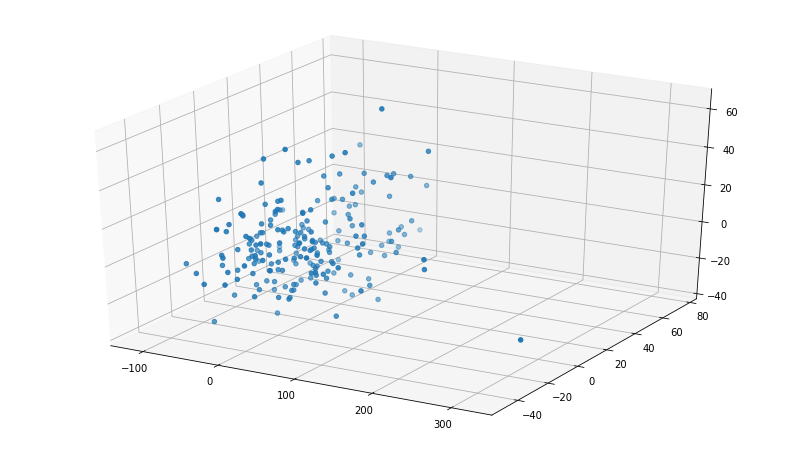

In [35]:
# %matplotlib inline
# plt.rcParams["figure.figsize"] = (14, 8)
# plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_new_col_train, alpha=0.8)
# plt.grid()
# plt.show()


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], x_train_pca[:, 2] )

In [36]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_new_col_train)
x_train_pca.shape

(212, 2)

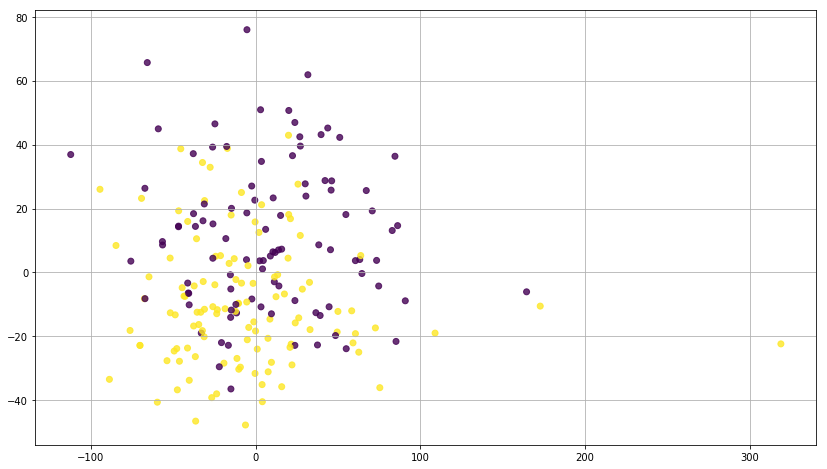

In [37]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 8)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_new_col_train, alpha=0.8)
plt.grid()
plt.show()

# Пункт 3. Использую TSNE

When we visualize the raw data itself the "texture" is clear, but not as clear as the different "islands" and clusters.

In [38]:
df_v03 = pd.read_csv('heart.csv')
df_v03.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.40,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.30,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.00,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.60,2,0,2,1


In [39]:
y = df_v03['target'].as_matrix()
y.shape

(303,)

In [40]:
X = df_v03.drop(['target'], axis=1).as_matrix()
X.shape

(303, 13)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
x_reduced_tsne = tsne.fit_transform(x_train)
x_reduced_tsne.shape

(212, 2)

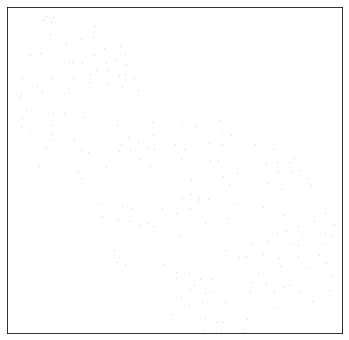

In [43]:
def plot_tsne(xy, colors=None, alpha=0.25, figsize=(6,6), s=0.9, cmap='hsv'):
    plt.figure(figsize=figsize, facecolor='white')
    plt.margins(0)
    #plt.axis('off')
    fig = plt.scatter(xy[:,0], xy[:,1],
                c=colors, # set colors of markers
                cmap=cmap, # set color map of markers
                alpha=alpha, # set alpha of markers
                marker=',', # use smallest available marker (square)
                s=s, # set marker size. single pixel is 0.5 on retina, 1.0 otherwise
                lw=0, # don't use edges
                edgecolor='') # don't use edges
    # remove all axes and whitespace / borders
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()
    
plot_tsne(x_reduced_tsne)

# Попробую воспользоваться алгоритмом k-mean

# Алгоритм k-means
**Необходимо:**
* Выбрать количество кластеров k, которое нам кажется оптимальным для наших данных.
* Выбрать случайным образом k точек (центроидов)
* Для каждой точки определить, к какому центроиду она ближе.
* Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду.
* Повторять последние два шага или $n\_iter$ число раз, или когда кластеры сойдутс

## Методы подбора $K$

Когда $J(C)$ начинает изменяться не так быстро, мы нашли оптимальное K.

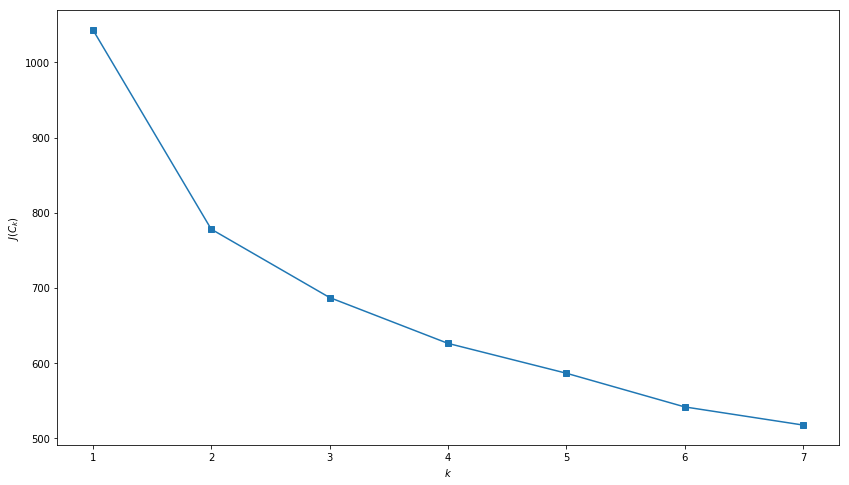

In [44]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_v03)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

### Судя по графику $k$=2

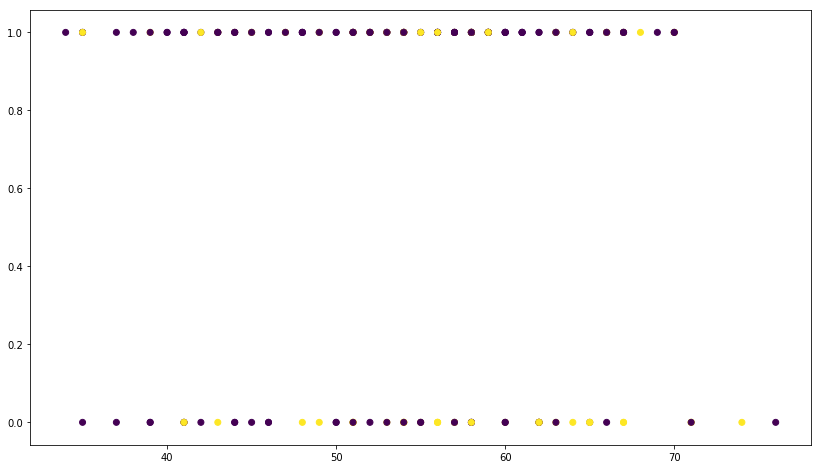

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
x_train_kmeans = kmeans.fit(x_train)

# Plot the predictions.
plt.scatter(x_train[:,0], x_train[:,1], c=x_train_kmeans.labels_)
plt.scatter(x_train_kmeans.cluster_centers_[:,0], 
            x_train_kmeans.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2);


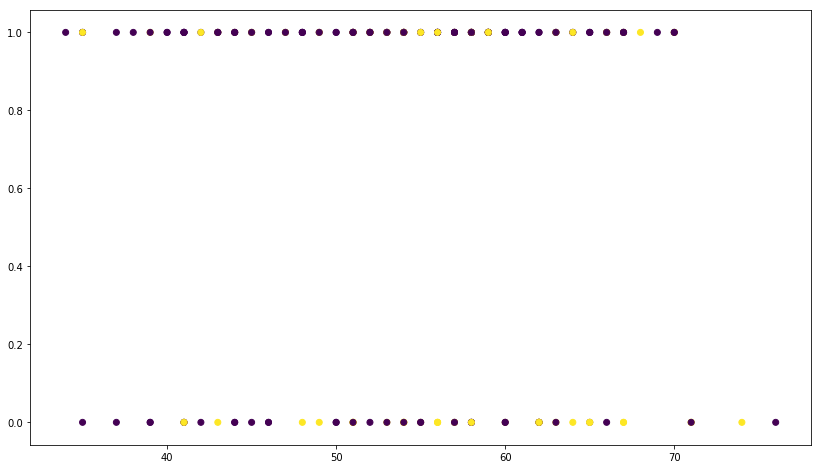

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
x_train_kmeans = kmeans.fit_predict(x_train)

# Plot the predictions.
plt.scatter(x_train[:,0], x_train[:,1], c=x_train_kmeans);